In [368]:
import pandas as pd
import os

%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data input

In [369]:
entity =  os.listdir('data')
entity

['gender_submission.csv', 'test.csv', 'train.csv']

In [370]:
# input data
df_1 = pd.read_csv('data/' + entity[2])
df_2 = pd.read_csv('data/' + entity[1])
df = df_1.append(df_2)
df = df.reset_index(drop = True, inplace = False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory data analysis & Fill na

In [371]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

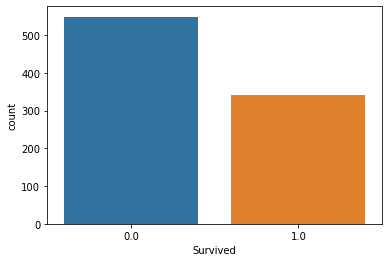

In [372]:
sns.countplot(df['Survived'])

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

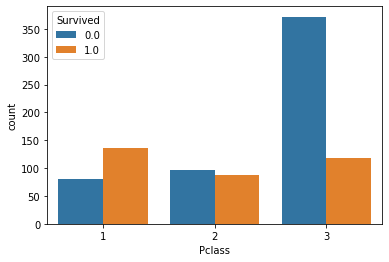

In [373]:
sns.countplot(df['Pclass'], hue = df['Survived'])

In [387]:
pd.crosstab(df['Pclass'], df['Sex']).T.style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


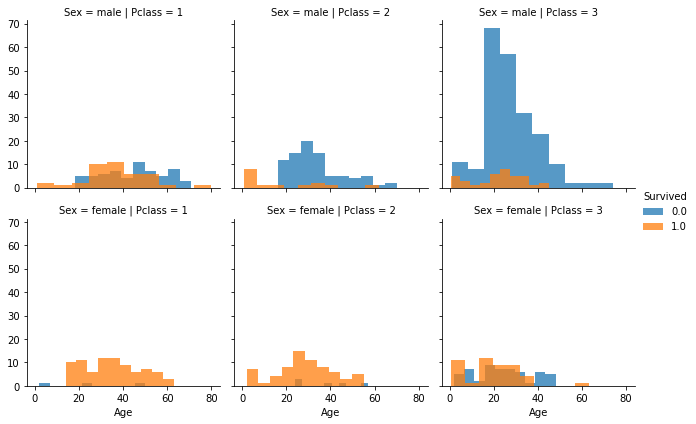

In [393]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

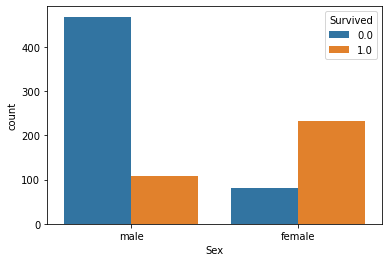

In [374]:
sns.countplot(df['Sex'], hue = df['Survived'])

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

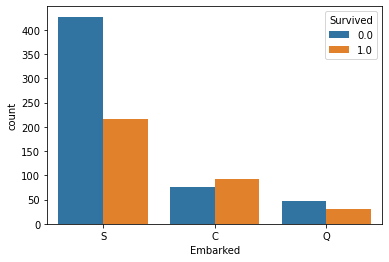

In [375]:
sns.countplot(df['Embarked'], hue = df['Survived'])

In [382]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [376]:
pd.crosstab(df['Embarked'], df['Pclass']).T.style.background_gradient(cmap = 'summer_r')

Embarked,C,Q,S
Pclass,,,
1,141,3,177
2,28,7,242
3,101,113,495


/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


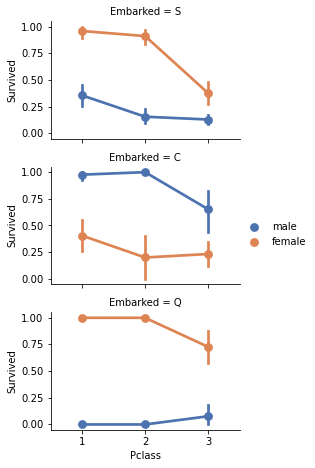

In [380]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


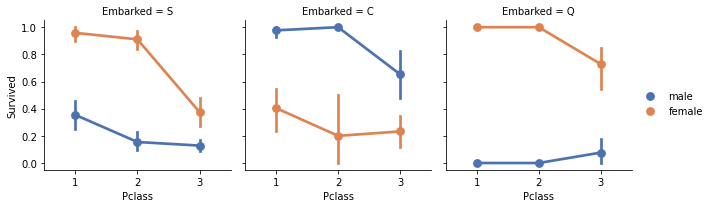

In [383]:
e = sns.FacetGrid(df, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


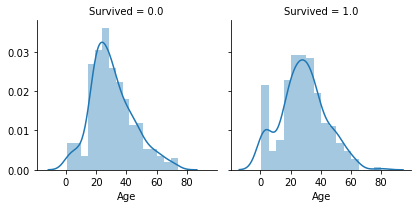

In [377]:
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.distplot, 'Age', kde = True)

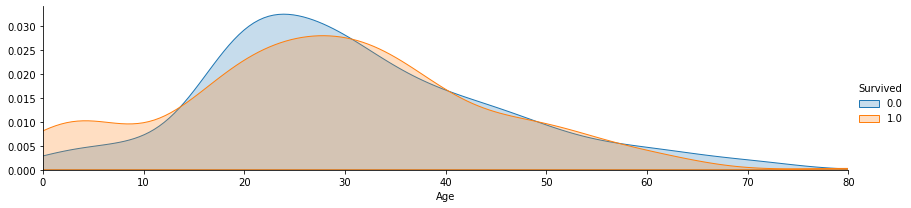

In [384]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


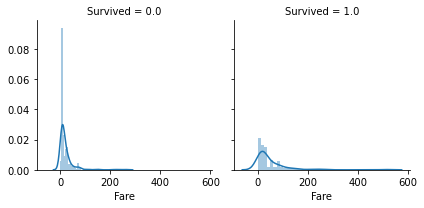

In [378]:
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.distplot, "Fare", kde = True)

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


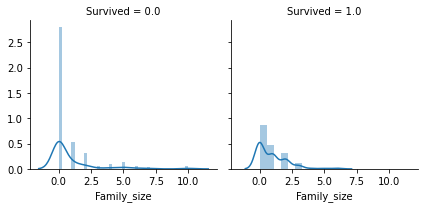

In [333]:
df['Family_size'] = df['SibSp'] + df['Parch']
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.distplot, "Family_size", kde = True)

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


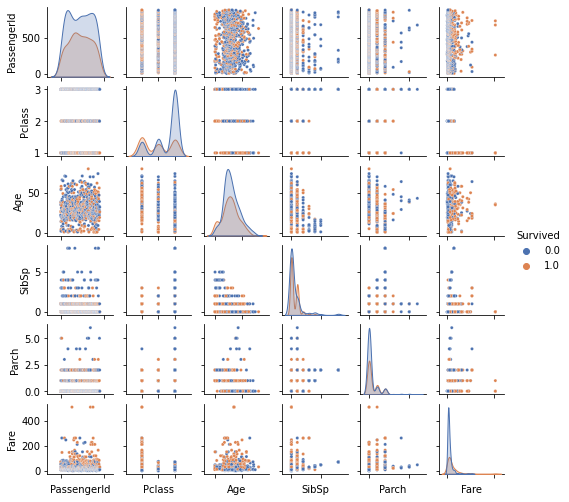

In [388]:
#pair plots of entire dataset
pp = sns.pairplot(df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

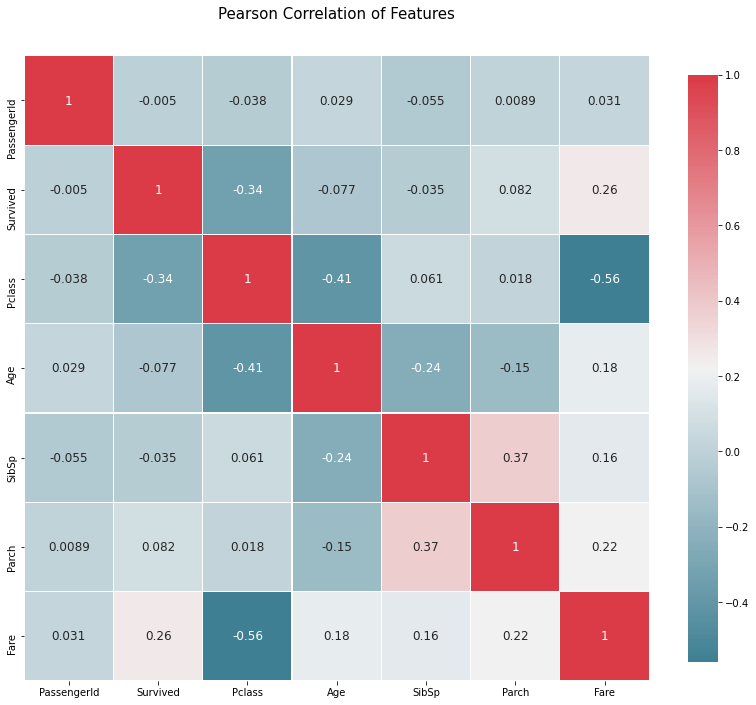

In [390]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

# Data Processing

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_size  1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [335]:
# Title
df['Title1'] = df['Name'].str.split(', ', expand = True)[1]

In [336]:
df['Title1'] = df['Title1'].str.split('.', expand = True)[0]

In [337]:
df['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [338]:
pd.crosstab(df['Title1'], df['Sex']).T.style.background_gradient(cmap = 'summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [339]:
pd.crosstab(df['Title1'], df['Survived']).T.style.background_gradient(cmap = 'summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [340]:
df.groupby('Title1')['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [341]:
df.groupby(['Title1', 'Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [342]:
# Title2: combinning with synonyms
A = [ 'Mlle', 'Mme', 'Ms', 'Dr','Major','Lady', 'the Countess','Jonkheer', 'Col', 'Rev', 'Capt','Don','Sir','Dona']
B = ['Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr','Mrs']
df['Title2'] = df['Title1'].replace(A, B)

In [343]:
pd.crosstab(df['Title2'], df['Survived']).T.style.background_gradient(cmap = 'summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [344]:
# Ticket
df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('/', "").replace(".", "").strip().split()[0] if not x.isdigit() else 'X')
df['Ticket'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ticket', ylabel='count'>

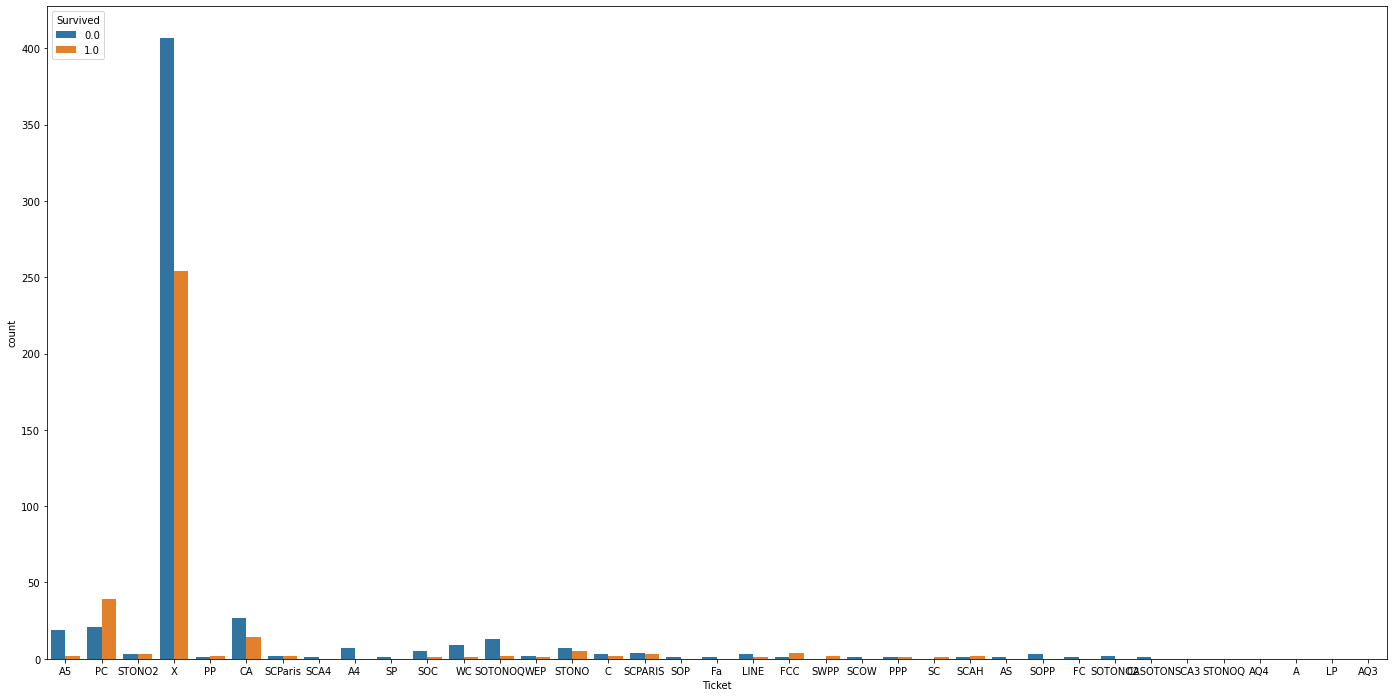

In [345]:
# strip remove the first and the last space, and then spliting
plt.figure(figsize = (24, 12))
sns.countplot(df['Ticket'], hue = df['Survived'])

In [346]:
# Embarked: use the most value to fill na, which is S
df['Embarked'] = df['Embarked'].fillna('S')

In [347]:
# Fare: ues the mean value to fill na
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [348]:
# Cabin: create new value if the data is na, which is NoCabin
df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin')
df['Cabin'].unique()


array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

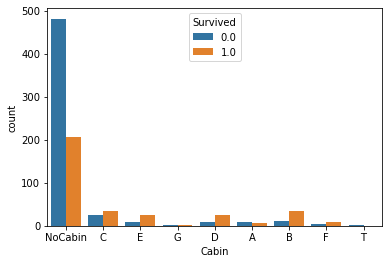

In [349]:
sns.countplot(df['Cabin'], hue = df['Survived'])

In [350]:
# Age: fill na based on Title1 with the age mean
df['Age'] = df['Age'].fillna(df.groupby(['Title1', 'Pclass'])['Age'].transform('mean'))

In [351]:
df[df['Title1'] == 'Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title1,Title2
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,X,13.00,NoCabin,S,0,Ms,Miss
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,X,7.75,NoCabin,Q,0,Ms,Miss


In [352]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title1,Title2
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,X,7.75,NoCabin,Q,0,Ms,Miss


In [353]:
df['Age'] = df['Age'].fillna(df[df['Title1'] == 'Ms']['Age'].sum())

# Data Processing to Model used

In [354]:
# 使用astype('category').cat.codes將資料型態轉換成dummy型態

In [355]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Title1',
       'Title2'],
      dtype='object')

In [356]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title1,Title2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A5,7.2500,NoCabin,S,1,Mr,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC,71.2833,C,C,1,Mrs,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STONO2,7.9250,NoCabin,S,0,Miss,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,X,53.1000,C,S,1,Mrs,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,X,8.0500,NoCabin,S,0,Mr,Mr
5,6,0.0,3,"Moran, Mr. James",male,28.31891,0,0,X,8.4583,NoCabin,Q,0,Mr,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,X,51.8625,E,S,0,Mr,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,X,21.0750,NoCabin,S,4,Master,Master


In [357]:
trans_col = ['Pclass','Sex','Ticket','Cabin', 'Embarked','Title1', 'Title2']

In [358]:
for i in trans_col:
    df[i] = df[i].astype('category').cat.codes

In [359]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title1,Title2
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.00000,1,0,2,7.2500,7,2,1,12,2
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,14,71.2833,2,0,1,13,3
2,3,1.0,2,"Heikkinen, Miss. Laina",0,26.00000,0,0,31,7.9250,7,2,0,9,1
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,36,53.1000,2,2,1,13,3
4,5,0.0,2,"Allen, Mr. William Henry",1,35.00000,0,0,36,8.0500,7,2,0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,2,"Spector, Mr. Woolf",1,28.31891,0,0,2,8.0500,7,2,0,12,2
1305,1306,NaN,0,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,14,108.9000,2,0,0,3,3
1306,1307,NaN,2,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,28,7.2500,7,2,0,12,2
1307,1308,NaN,2,"Ware, Mr. Frederick",1,28.31891,0,0,36,8.0500,7,2,0,12,2


# Machine learning

In [360]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Title1',
       'Title2']]

In [361]:
df_train = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Title1',
       'Title2']]
df_train = df_train[~df_train['Survived'].isna()]

In [362]:
df_test = df[['PassengerId','Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Title1',
       'Title2']]

df_test = df_test[df_test['Survived'].isna()]
submit = df_test[['PassengerId']]
df_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Title1',
       'Title2']]


In [363]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title1,Title2
891,2,1,34.50000,0,0,36,7.8292,7,1,0,12,2
892,2,0,47.00000,1,0,36,7.0000,7,2,1,13,3
893,1,1,62.00000,0,0,36,9.6875,7,1,0,12,2
894,2,1,27.00000,0,0,36,8.6625,7,2,0,12,2
895,2,0,22.00000,1,1,36,12.2875,7,2,2,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,1,28.31891,0,0,2,8.0500,7,2,0,12,2
1305,0,0,39.00000,0,0,14,108.9000,2,0,0,3,3
1306,2,1,38.50000,0,0,28,7.2500,7,2,0,12,2
1307,2,1,28.31891,0,0,36,8.0500,7,2,0,12,2


In [364]:
import statsmodels.formula.api as smf

In [365]:
df_train.head(5).columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family_size', 'Title1', 'Title2'],
      dtype='object')

In [366]:
model = smf.logit(formula='Survived ~   Family_size  + Cabin + C(Sex) + Age + C(Title2) + Ticket + Fare  * C(Pclass) +Embarked', data = df).fit()
model.summary()

         Current function value: 0.403158
         Iterations: 35


/Users/kimtyweter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Sat, 17 Jul 2021   Pseudo R-squ.:                  0.3946
Time:                        23:12:03   Log-Likelihood:                -359.21
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.968e-91
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              24.5802   1.31e+04      0.002      0.998   -2.56e+04    2.56e+04
C(Sex)[T.1]           -19.6836   1.31e+04     -0.002      0.999   -2.56e+04    2.56e+04
C(Title2)[T.1]        -20.0570   1.31e+04     -0.002      0.999   -2.56e+04    2.56e+04
C(Title2)[T.2]         -3.2725      0.533     -6.143      0.000      -4.317      -2.228
C(Title2)[T.3]        -19.0813   1.31e+04     -0.001      0.999   -2.56e+04    2.56e+04
C(Pclass)[T.1]         -1.0316      0.519     -1.989      0.047      -2.048      -0.015
C(Pclass)[T.2]         -2.1361      0.481     -4.441      0.000      -3.079      -1.193
Family_size            -0.5549      0.101     -5.498      0.000      -0.753      -0.357
Cabin                  -0.1241      0.075     -1.659      0.097      -0.271       0.023
Age                    -0.0336      0.010     -3.355      0.001      -0.053      -0.014
Ticket                  0.0008      0.010      0.079      0.937      -0.019       0.021
Fare                    0.0026      0.003      0.997      0.319      -0.003       0.008
Fare:C(Pclass)[T.1]     0.0138      0.014      0.978      0.328      -0.014       0.041
Fare:C(Pclass)[T.2]     0.0214      0.016      1.330      0.184      -0.010       0.053
Embarked               -0.2150      0.123     -1.746      0.081      -0.456       0.026
=======================================================================================
"""

# Submit

In [289]:
l = []
predictions = model.predict(df_test).round()
for i in predictions:
    l.append(int(i))
submit['Survived'] = l


In [290]:
submit.to_csv('submit.csv', index = 0)